# Estación Moratalaz

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_36.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,39.709677
2013-02-01,31.774194
2013-03-01,25.322581
2013-04-01,23.000000
2013-05-01,24.451613


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

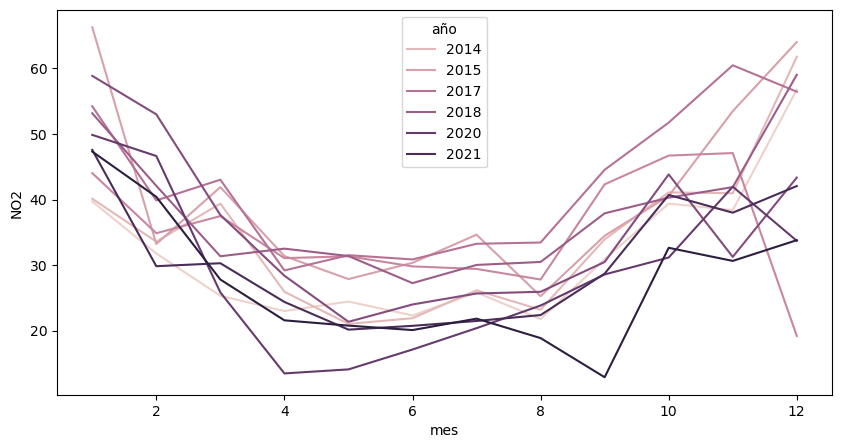

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

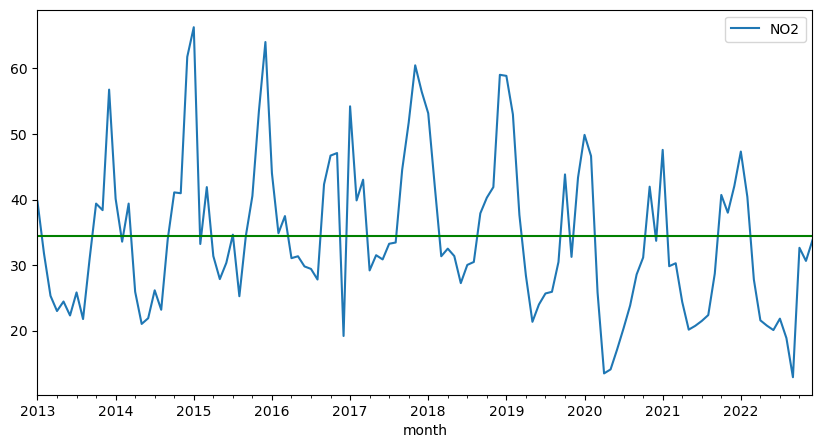

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

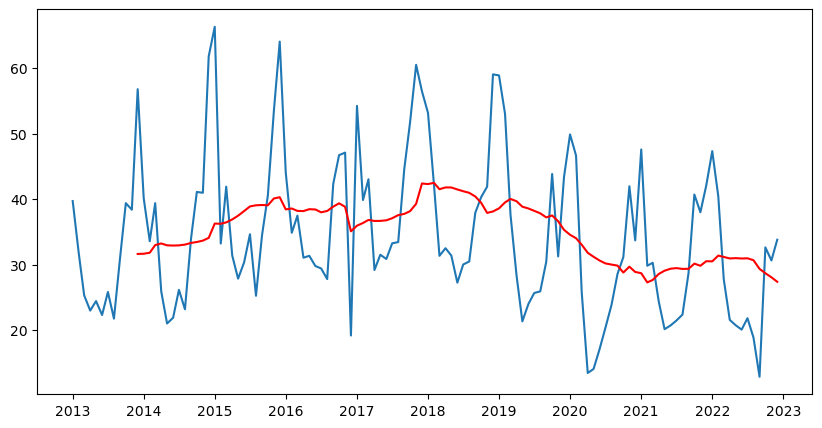

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,39.709677
2013-02-01,31.774194
2013-03-01,25.322581
2013-04-01,23.000000
2013-05-01,24.451613


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,39.709677,2013,1
2013-02-01,31.774194,2013,2
2013-03-01,25.322581,2013,3
2013-04-01,23.000000,2013,4
2013-05-01,24.451613,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,39.709677,2013,1
2013-02-01,31.774194,2013,2
2013-03-01,25.322581,2013,3
2013-04-01,23.000000,2013,4
2013-05-01,24.451613,2013,5


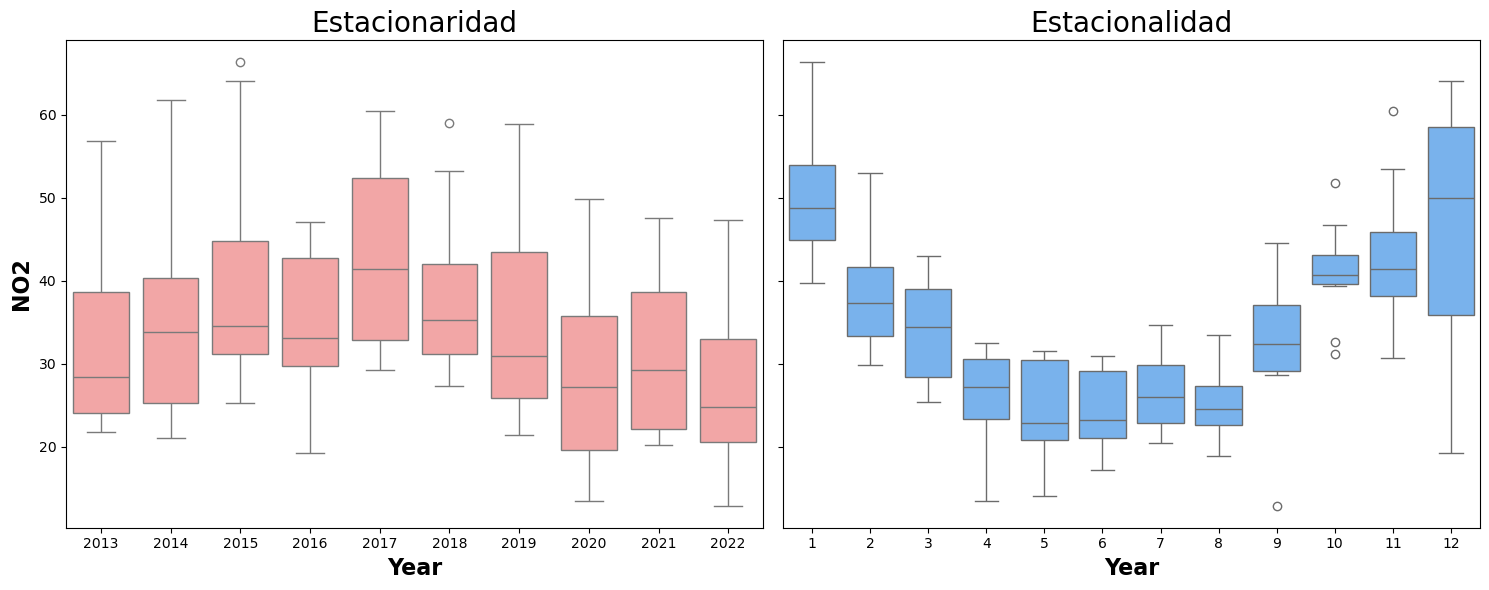

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.6232495758850993,
 0.8656415641102533,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 746.2149247295249)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.6232495758850993
p-value 0.8656415641102533
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6527718433192717
2 mes Lag, 0.41228960309734114
3 mes Lag, 0.12523592338865042
4 mes Lag, -0.12663708721840714
5 mes Lag, -0.3386638964876349
6 mes Lag, -0.3997832582567537
7 mes Lag, -0.4140073815511818
8 mes Lag, -0.23115478093332825
9 mes Lag, 0.046896547967778916
10 mes Lag, 0.33743545341730335
11 mes Lag, 0.542382362203474
12 mes Lag, 0.668056761088122
13 mes Lag, 0.5908294507514561
14 mes Lag, 0.3795343065924472
15 mes Lag, 0.14572527888436507
16 mes Lag, -0.174229129928063
17 mes Lag, -0.40409692256912266
18 mes Lag, -0.45414914039892196
19 mes Lag, -0.44023709911788494
20 mes Lag, -0.26859561537286036
21 mes Lag, -0.007916150277258078
22 mes Lag, 0.24658698310828753
23 mes Lag, 0.44728371039168907
24 mes Lag, 0.5754616080616716
25 mes Lag, 0.5083271664131094
26 mes Lag, 0.28522191618092035
27 mes Lag, 0.04500366894608467
28 mes Lag, -0.2117707750882081
29 mes Lag, -0.41541890294461864
30 mes Lag, -0.503799033067614
31 mes Lag, -0.48362820679547547
32

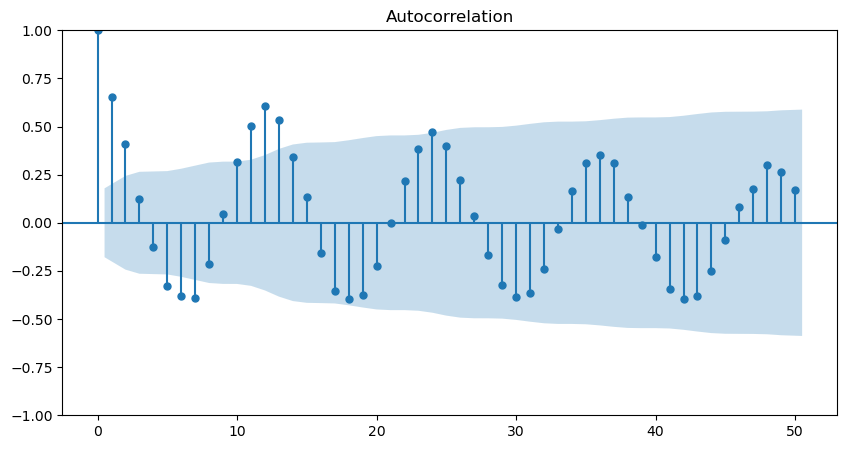

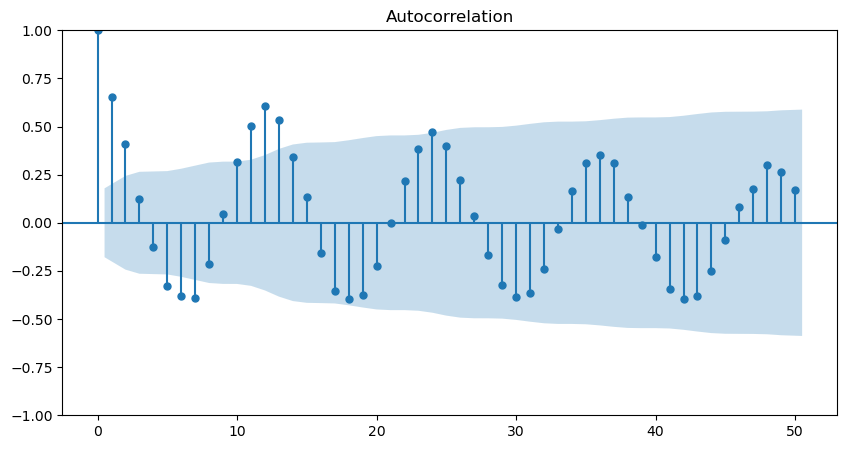

In [19]:
plot_acf(df, lags = 50)

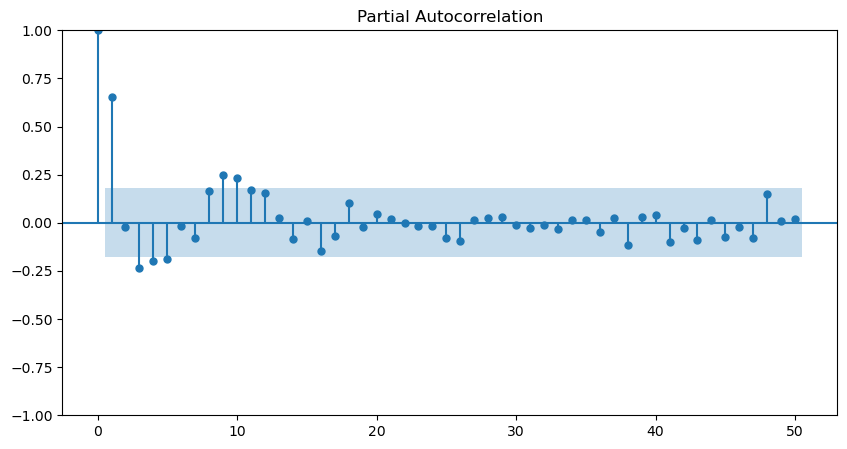

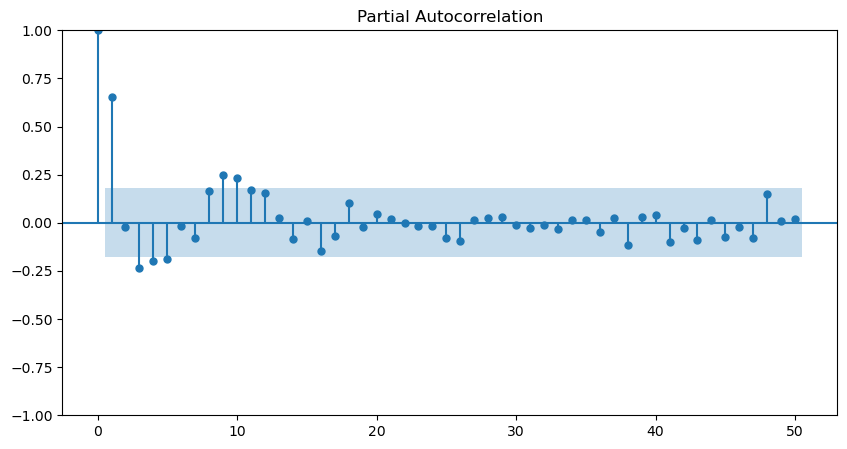

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,39.709677
2013-02-01,31.774194
2013-03-01,25.322581
2013-04-01,23.000000
2013-05-01,24.451613


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 62%|██████▎   | 15/24 [00:00<00:00, 24.89it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 516 ms
Wall time: 1.21 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
14,10.556811,"(2, 1, 2)"
20,10.703250,"(3, 1, 2)"
19,11.058811,"(3, 1, 1)"
0,15.012595,"(0, 1, 0)"
18,15.017840,"(3, 1, 0)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(2, 1, 2),  # modelo arima
               seasonal_order=(2, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  6.900603188734478
CPU times: total: 312 ms
Wall time: 696 ms


C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,real,pred,error
2020-07-01,20.387097,26.021655,5.634559
2020-08-01,23.838710,25.761895,1.923185
2020-09-01,28.580645,34.937433,6.356787
2020-10-01,31.161290,43.357745,12.196455
2020-11-01,41.967742,42.647731,0.679989
2020-12-01,33.709677,50.527832,16.818155
2021-01-01,47.580645,49.936745,2.356100
2021-02-01,29.838710,40.323093,10.484383
2021-03-01,30.290323,33.382307,3.091985
2021-04-01,24.387097,24.606861,0.219764


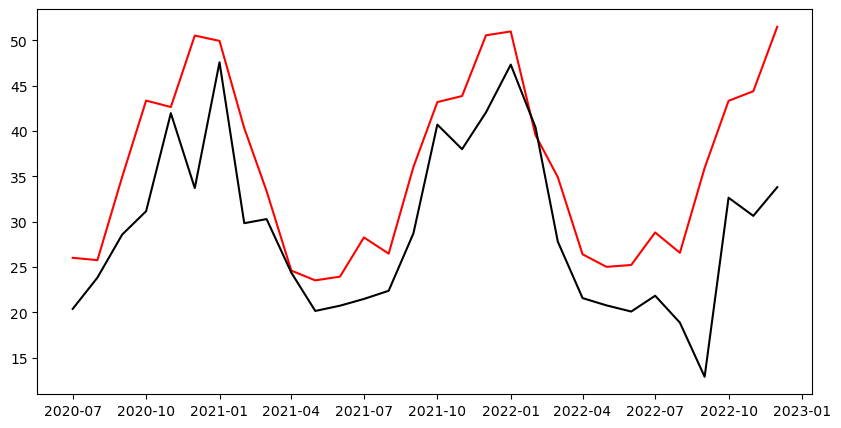

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,50.119625
2023-02-01,39.352820
2023-03-01,34.641131
2023-04-01,26.388484
2023-05-01,25.037496
2023-06-01,25.066604
2023-07-01,28.660016
2023-08-01,26.591606
2023-09-01,36.155301
2023-10-01,43.190063


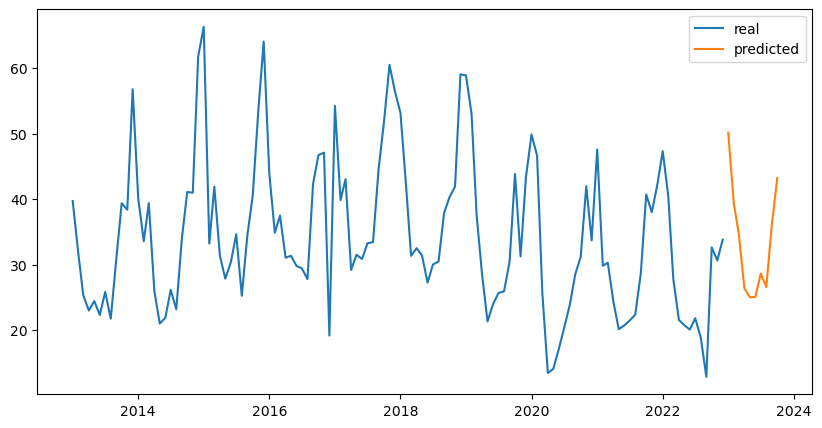

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,50.119625
2023-02-01,39.352820
2023-03-01,34.641131
2023-04-01,26.388484
2023-05-01,25.037496
2023-06-01,25.066604
2023-07-01,28.660016
2023-08-01,26.591606
2023-09-01,36.155301
2023-10-01,43.190063


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
df_36_23 = df23[df23["ESTACION"] == 36]
df_36_23

,Unnamed: 0,ESTACION,ANO,MES,NO2
88,88,36,2023,1,33.838710
89,89,36,2023,2,33.903226
90,90,36,2023,3,29.032258
91,91,36,2023,4,21.580645
92,92,36,2023,5,16.612903
93,93,36,2023,6,21.741935
94,94,36,2023,7,21.967742
95,95,36,2023,8,20.258065
96,96,36,2023,9,30.032258
97,97,36,2023,10,31.903226


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(df_36_23)

,Unnamed: 0,NO2
month,,
2023-01-01,88,33.838710
2023-02-01,89,33.903226
2023-03-01,90,29.032258
2023-04-01,91,21.580645
2023-05-01,92,16.612903
2023-06-01,93,21.741935
2023-07-01,94,21.967742
2023-08-01,95,20.258065
2023-09-01,96,30.032258


In [39]:
df_36_23.drop("Unnamed: 0", axis=1, inplace=True)

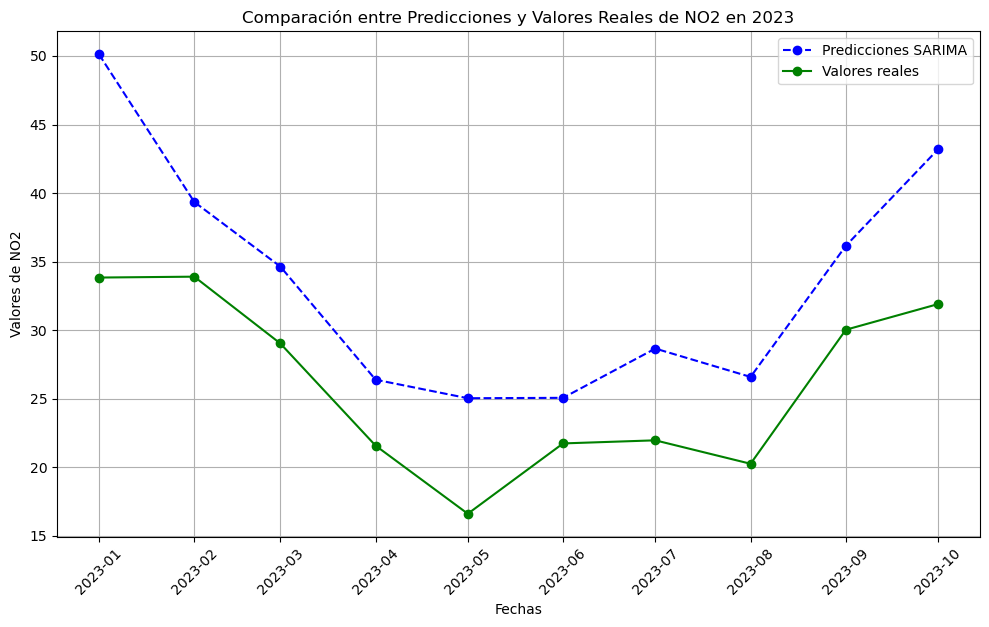

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
df_36_23.index = pd.to_datetime(df_36_23.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = df_36_23['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
df_36_23["NO2"]

month
2023-01-01    33.838710
2023-02-01    33.903226
2023-03-01    29.032258
2023-04-01    21.580645
2023-05-01    16.612903
2023-06-01    21.741935
2023-07-01    21.967742
2023-08-01    20.258065
2023-09-01    30.032258
2023-10-01    31.903226
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,50.119625
2023-02-01,39.352820
2023-03-01,34.641131
2023-04-01,26.388484
2023-05-01,25.037496
2023-06-01,25.066604
2023-07-01,28.660016
2023-08-01,26.591606
2023-09-01,36.155301
2023-10-01,43.190063


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [df_36_23, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,33.838710
2023-02-01,33.903226
2023-03-01,29.032258
2023-04-01,21.580645
2023-05-01,16.612903
2023-06-01,21.741935
2023-07-01,21.967742
2023-08-01,20.258065
2023-09-01,30.032258
2023-10-01,31.903226


In [44]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    29.640846
dtype: float64

In [45]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Moratalaz"})
dff

,Moratalaz
NO2,29.640846


In [47]:
dff.to_csv('../../clean_visuals/predicts23/36_Moratalaz.csv', index=True)